# <span style="color:red"> Assignment - 1   Question - 4 </span> 

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Part 1

In [17]:
def bitQuantizeImage(im,k):
    val=np.power(2,k)-1
    mini=np.amin(im)
    maxi=np.amax(im)
    return np.round(val* ((im-mini)/(maxi-mini)))

## Part 2

Text(0.5, 1.0, '007_test1 image original')

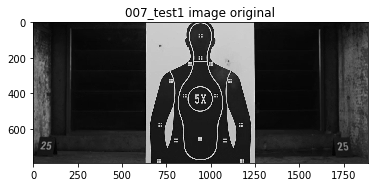

In [14]:
img1=cv.imread('../images/007_test1.png',1)
img1_gs=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1_gs,cmap="gray")
plt.title("007_test1 image original")

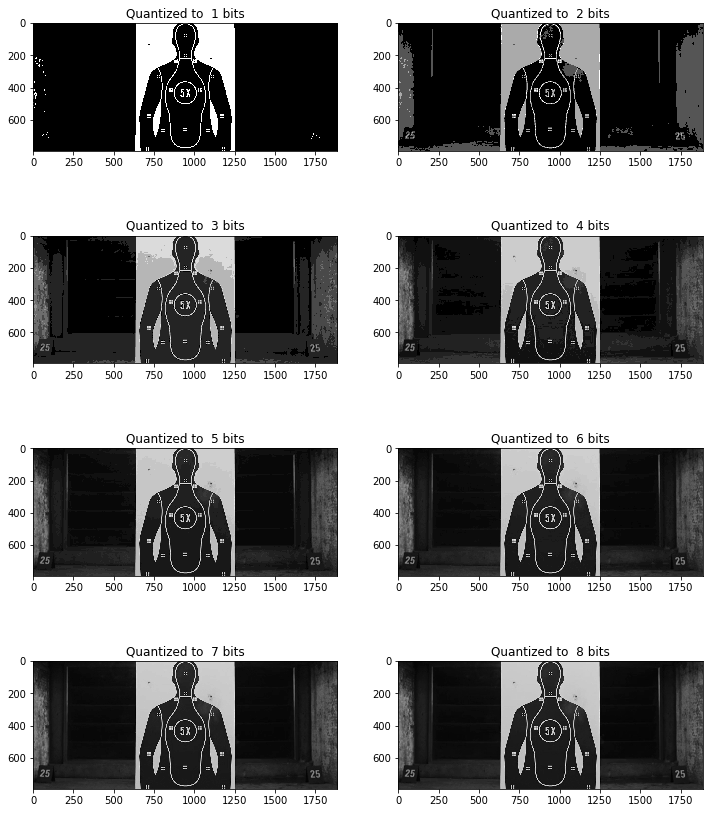

In [4]:
f, axarr = plt.subplots(4,2 ,figsize=(12,15))
j=0
k=0
for i in range(1,9):
    if(i>2):
        j=1
    if(i>4):
        j=2
    if(i>6):
        j=3
    img1_quant=bitQuantizeImage(img1_gs,i)
    val=np.power(2,i)
    img1_quant =  img1_quant/val * 255
    axarr[j][k].imshow(img1_quant,cmap="gray")
    axarr[j][k].set_title("Quantized to "+" "+str(i)+" bits")
    k=(k+1)%2

## Part 3

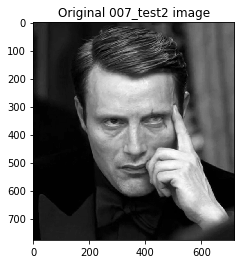

In [5]:
img2=cv.imread('../images/007_test2.png',1)
img2_gs=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2_gs,cmap="gray")
plt.title("Original 007_test2 image")
row,col = img2_gs.shape

In [6]:
bin_fun=lambda i,j:np.binary_repr(img2_gs[i][j],width=8)

In [7]:
lst=[bin_fun(x,y) for x in range(row) for y in range(col)]

In [8]:
def bit_img(lst,row,col,bit_pos):
    val=np.power(2,bit_pos-1)
    return (np.array([i[8-bit_pos] for i in lst],dtype=np.uint8) * val).reshape(row,col)

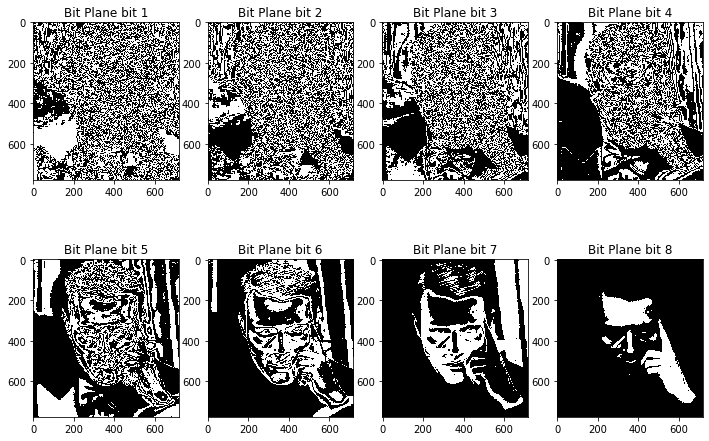

In [18]:
f, axarr = plt.subplots(2,4 ,figsize=(12,8))
j=0
k=0
for i in range(1,9):
    if(i>4):
        j=1
    axarr[j][k].imshow(bit_img(lst,row,col,i),cmap="gray")
    axarr[j][k].set_title("Bit Plane"+" bit"+" "+str(i))
    k=(k+1)%4

## Part 4

Text(0.5, 1.0, 'Original q_corrupt image')

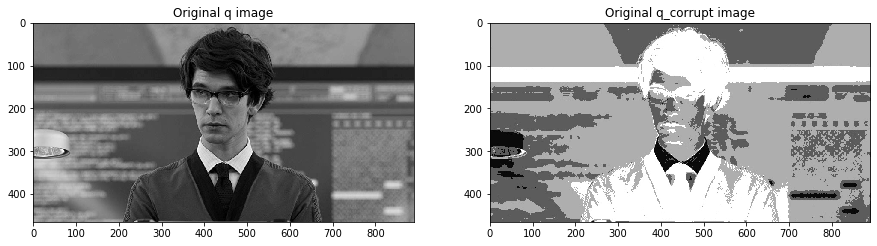

In [10]:
img3=cv.imread('../images/q.jpg',1)
img3_gs=cv.cvtColor(img3,cv.COLOR_BGR2GRAY)

img3_corrupt=cv.imread('../images/q_corrupt.jpg',1)
img3_corrupt=cv.cvtColor(img3_corrupt,cv.COLOR_BGR2GRAY)

f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img3_gs,cmap="gray")
axarr[1].imshow(img3_corrupt,cmap="gray")
axarr[0].set_title("Original q image")
axarr[1].set_title("Original q_corrupt image")

Text(0.5, 1.0, 'Histogram of q_corrupt image')

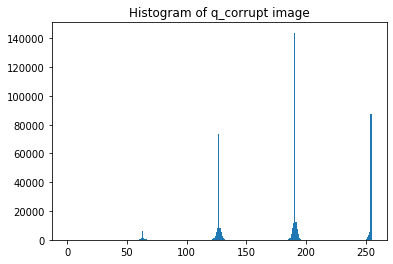

In [11]:
plt.hist(img3_corrupt.ravel(), bins=256, range=(0.0, 255))
plt.title("Histogram of q_corrupt image")

####  By seeing the above Histogram Plot we can say that there were nearly 4 discrete values. Hence we can say that  the q_corrupt image is 4 bit Quantized image of original Image. 
<span style="color:green ; font-size:18px">1 . Hence first step is to quantize to 4 bits. </span>
#### Next observation is Black hair is seen as pure white and white collar and some other white objects appear black.
<span style="color:green ; font-size:18px">2 . Therefore next step is to to take the negative of image obtained in Step 1 .</span>

**For viewing image, it is scaled from 0 to 255**

Mean difference between original and obtained:   -68.43939456044751
Standard deviation between original and obtained:   20.99449405215083


Text(0.5, 1.0, 'Original q_corrupt image')

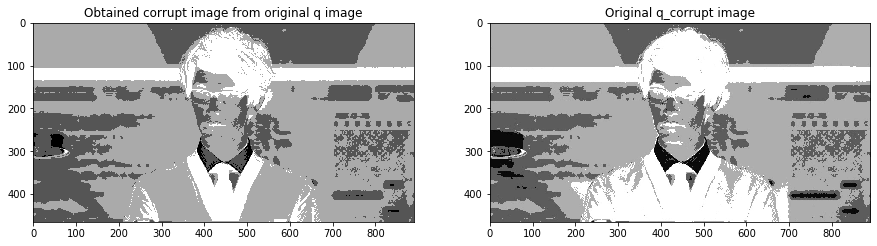

In [12]:
k=2
img3_quant=bitQuantizeImage(img3_gs,k) #Taking 4 bit quantized value
kk= (3 -  img3_quant); #Taking Negative

val=np.power(2,k)
kk= kk/val * 255

print("Mean difference between original and obtained:  ",np.mean(kk-img3_corrupt))
print("Standard deviation between original and obtained:  ",np.std(kk-img3_corrupt))

f, axarr = plt.subplots(1,2,figsize=(15,12))
axarr[0].imshow(kk,cmap="gray")
axarr[1].imshow(img3_corrupt,cmap="gray")
axarr[0].set_title("Obtained corrupt image from original q image")
axarr[1].set_title("Original q_corrupt image")